In [1]:
!pip3 install image-quality
import imquality.brisque as brisque

In [2]:
import numpy as np
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt
from skimage.morphology import disk
from skimage.filters import rank
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
img_name = f"C:/Users/ArrunPersonal/Codes/ExDark/ExDark_RawData/2015_00001.png"
img = np.array(Image.open(img_name))

In [4]:
def local_histogram_equalization(img_in):
    img = plt.imread(img_name)
    selem = disk(0.75*min(np.shape(img)[0], np.shape(img)[1]))
    #selem = disk(16)
    img_eq = np.zeros((np.shape(img)))
    for i in range(np.shape(img)[2]):
        img_eq[:,:,i] = rank.equalize(img[:,:,i], selem=selem)/255
    #print(brisque.score(img_eq))
    return img_eq

In [5]:
def histogram_equalization(img_in):
    
    # segregate color streams
    b,g,r = cv2.split(img_in)
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])
    
    # calculate cdf    
    cdf_b = np.cumsum(h_b)  
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)
    
    # mask all pixels with value=0 and replace it with mean of the pixel values 
    cdf_m_b = np.ma.masked_equal(cdf_b,0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min())*255/(cdf_m_b.max()-cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b,0).astype('uint8')
  
    cdf_m_g = np.ma.masked_equal(cdf_g,0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min())*255/(cdf_m_g.max()-cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g,0).astype('uint8')
    
    cdf_m_r = np.ma.masked_equal(cdf_r,0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min())*255/(cdf_m_r.max()-cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r,0).astype('uint8')
    
    # merge the images in the three channels
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]
  
    img_out = cv2.merge((img_b, img_g, img_r))
    #print(brisque.score(img_out))
    return img_out

In [6]:
import cv2
import numpy as np
clache=[]
def CLAHE(img_in):
    clahe = cv2.createCLAHE(clipLimit = 0.03,tileGridSize=(32,32))
    img_output = np.zeros(np.shape(img_in))
    

    for i in range(np.shape(img)[2]):
        img_output[:,:,i] = clahe.apply(img_in[:,:,i])/255
    
    # image_bw = cv2.cvtColor(img_in, cv2.COLOR_RGB2YUV)
  
    # image_bw[:,:,0] = clahe.apply(image_bw[:,:,0])
    # image_bw[:,:,1] = clahe.apply(image_bw[:,:,1])
    # image_bw[:,:,2] = clahe.apply(image_bw[:,:,2])
    # img_output = cv2.cvtColor(image_bw, cv2.COLOR_YUV2BGR)
    #print(brisque.score(img_output))
    return img_output


<ipython-input-7-7499c4334786>:6: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  plt.subplot(2,2,3).imshow(local_histogram_equalization(img))


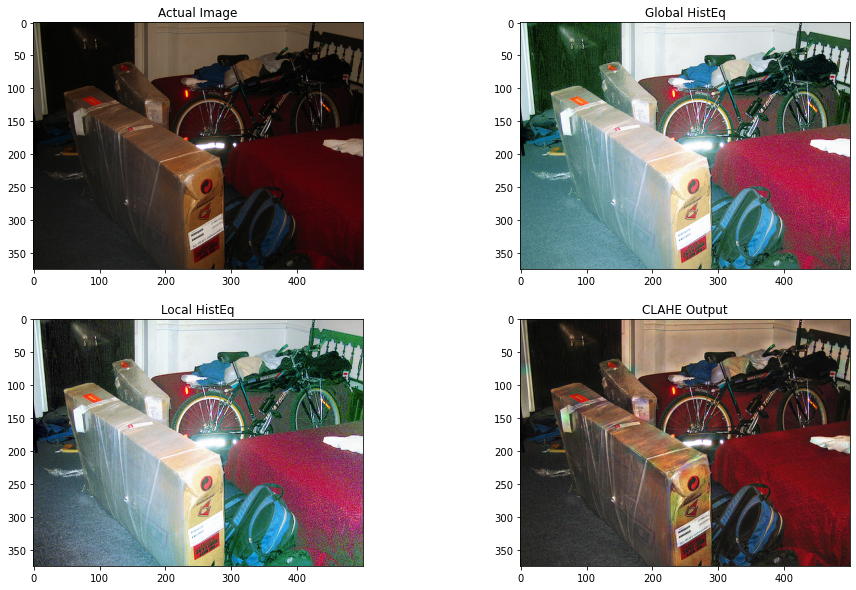

In [7]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1).imshow(img)
plt.title("Actual Image")
plt.subplot(2,2,2).imshow(histogram_equalization(img))
plt.title("Global HistEq")
plt.subplot(2,2,3).imshow(local_histogram_equalization(img))
plt.title("Local HistEq")
plt.subplot(2,2,4).imshow(CLAHE(img))
plt.title("CLAHE Output")
plt.show()

In [8]:
for i,e in enumerate(os.listdir("C:/Users/ArrunPersonal/Codes/ExDark/ExDark_RawData")):
    
    img_name = "C:/Users/ArrunPersonal/Codes/ExDark/ExDark_RawData/"+e
    img = np.array(Image.open(img_name))
    
    he_f = "C:/Users/ArrunPersonal/Codes/ExDark/ExDark_HE/"+e
    lhe_f = "C:/Users/ArrunPersonal/Codes/ExDark/ExDark_LHE/"+e
    clahe_f = "C:/Users/ArrunPersonal/Codes/ExDark/ExDark_CLAHE/"+e

    plt.imsave(fname = he_f, arr = histogram_equalization(img))
    plt.imsave(fname = lhe_f, arr = local_histogram_equalization(img))
    plt.imsave(fname = clahe_f, arr = CLAHE(img))
    print(f"Process compelte for image {i+1}")

<ipython-input-8-879f6fde62c3>:11: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  plt.imsave(fname = lhe_f, arr = local_histogram_equalization(img))


Process compelte for image 1
Process compelte for image 2
Process compelte for image 3
Process compelte for image 4
Process compelte for image 5
Process compelte for image 6
Process compelte for image 7
Process compelte for image 8
Process compelte for image 9
Process compelte for image 10
Process compelte for image 11
Process compelte for image 12
Process compelte for image 13
Process compelte for image 14
Process compelte for image 15
Process compelte for image 16
Process compelte for image 17
Process compelte for image 18
Process compelte for image 19
Process compelte for image 20
Process compelte for image 21
Process compelte for image 22
Process compelte for image 23
Process compelte for image 24
Process compelte for image 25
Process compelte for image 26
Process compelte for image 27
Process compelte for image 28
Process compelte for image 29
Process compelte for image 30
Process compelte for image 31
Process compelte for image 32
Process compelte for image 33
Process compelte fo

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ArrunPersonal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-879f6fde62c3>", line 11, in <module>
    plt.imsave(fname = lhe_f, arr = local_histogram_equalization(img))
  File "<ipython-input-4-979ae3d94d5b>", line 7, in local_histogram_equalization
    img_eq[:,:,i] = rank.equalize(img[:,:,i], selem=selem)/255
  File "C:\Users\ArrunPersonal\AppData\Roaming\Python\Python38\site-packages\skimage\filters\rank\generic.py", line 486, in equalize
    return _apply_scalar_per_pixel(generic_cy._equalize, image, selem,
  File "C:\Users\ArrunPersonal\AppData\Roaming\Python\Python38\site-packages\skimage\filters\rank\generic.py", line 272, in _apply_scalar_per_pixel
    return np.squeeze(out, axis=-1)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File

TypeError: object of type 'NoneType' has no len()